In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import sys
from importlib import reload
from pathlib import Path
import scanpy as sc
from pylab import rcParams
from matplotlib.patches import Patch
import re
import seaborn as sns
import glob

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import scvelo as scv
scv.logging.print_version()


scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

%matplotlib inline

Running scvelo 0.2.2 (python 3.8.3) on 2020-10-20 13:07.


In [2]:
###----- Get dir & load / reload packages
try:
    code_dir
except NameError:
    print("Start")
    code_dir = os.getcwd()
    base_dir = code_dir.replace("/plotting_codes","")
    tools_dir = base_dir + "/tools"

    sys.path.insert(1, tools_dir)
    import sc_addons
    import sc_pl_addons
else:
    print("Reload")
    reload(sc_addons)
    reload(sc_pl_addons)

Start


In [3]:
## ----- Setup working dir
sp_name = "0_Acute-Chronic"
analysis_name = ["0", "resampled"] 

wk_dir = base_dir + "/9_Figures/%s/%s_%s"%(sp_name, analysis_name[0], analysis_name[1])
Path(wk_dir).mkdir(parents=True, exist_ok=True)
os.chdir(wk_dir)

print(sp_name)

0_Acute-Chronic


In [21]:
###----- old - new cluster names
order_file ='%s/%s/2_scVelo'%(base_dir, sp_name) + '/%s_scVelo_out_%sNoDyn/pt_ordered_cluster_avg.csv'%(analysis_name[0], analysis_name[1])
order_df = pd.read_csv(order_file)
louvain_new_ordered = order_df['louvain_new_label'].tolist()
louvain_old_ordered = order_df['louvain'].tolist()

In [5]:
adata_h5ad = '%s/%s/1_Scanpy'%(base_dir, sp_name) + '/%s_Scanpy_out_%s/%s_paga.h5ad'%(analysis_name[0], analysis_name[1], sp_name)
adata = sc.read_h5ad(adata_h5ad)

adata.obs["louvain_celltype"] = ["%s_%s"%(x,y) for index, (x,y) in enumerate(zip(adata.obs['louvain'], adata.obs['cell_type']))]

#--- Match old & new louvain levels
adata.obs['louvain_old'] = adata.obs['louvain']
adata.uns['louvain_old_colors'] = adata.uns['louvain_colors']
adata.obs['louvain'] = [ louvain_new_ordered[louvain_old_ordered.index(int(x))] for x in adata.obs['louvain'] ]
category_order = order_df.sort_values('louvain')['louvain_new_label'].tolist()
adata.obs['louvain'] = pd.Categorical(adata.obs['louvain'].tolist(), categories=category_order) # The key is to set categories according to original order...

adata.obs['Infection type'] = [ 'Armstrong' if 'A' in x else 'Clone13' if 'C' in x else 'Naive' for x in adata.obs['cell_type']]
adata.obs['cell_id'] = adata.obs.index.tolist()

In [6]:
###----- Create object with louvain clusters ranekd by new order
old_louvain_order = adata.obs['louvain'].cat.categories.tolist()
old_louvain_colors = adata.uns['louvain_colors']
new_louvain_colors = [old_louvain_colors[old_louvain_order.index(x)] for x in louvain_new_ordered]

adata_neworder = adata.copy()
adata_neworder.obs['louvain'] = pd.Categorical(adata.obs['louvain'].tolist(), categories=louvain_new_ordered)
adata_neworder.uns['louvain_colors'] = new_louvain_colors

# 1. Scatterplots

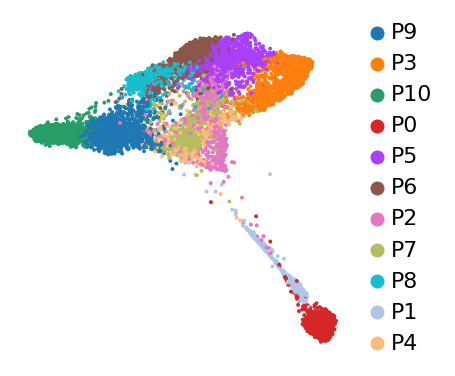

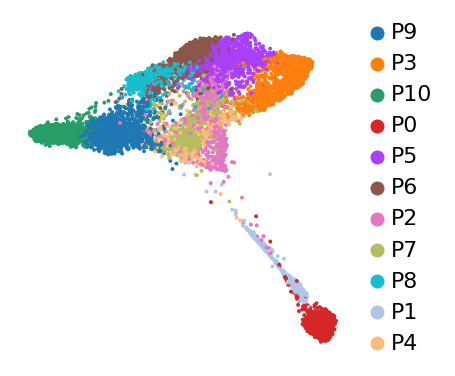

In [230]:
### New louvain cluster numeric order plot
save_name = '_louvain_new_scatter_with_leg'

### Plot
rcParams['figure.figsize'] = 3, 3

sc.pl.draw_graph(adata, color=['louvain'], frameon=False, save = save_name + '.png', title='')
sc.pl.draw_graph(adata, color=['louvain'], frameon=False, save = save_name + '.pdf', title='')

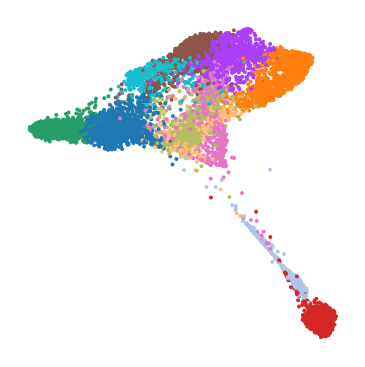

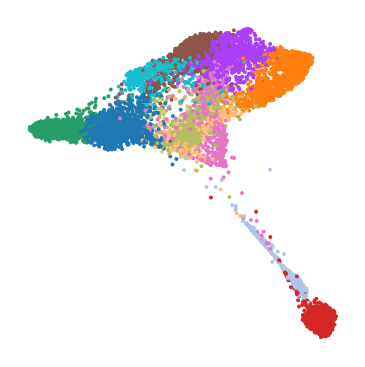

In [233]:
### New louvain cluster numeric order plot
save_name = '_louvain_new_scatter'

### Plot
rcParams['figure.figsize'] = 3, 3

sc.pl.draw_graph(adata, color=['louvain'], frameon=False, legend_loc=None, save = save_name + '.png', title='')
sc.pl.draw_graph(adata, color=['louvain'], frameon=False, legend_loc=None, save = save_name + '.pdf', title='')

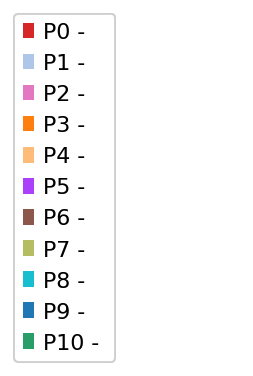

In [118]:
### New louvain cluster numeric order legend
save_name = 'louvain_new_scatter_leg'

### Plot
fig, ax=plt.subplots(figsize=(2,3))

phenotype_labels = ["" for x in louvain_new_ordered]

cpatch_elements = []
for i in range(0,len(louvain_new_ordered)):
    cpatch_elements.append(Patch(facecolor=adata.uns['louvain_colors'][louvain_old_ordered[i]], label="%s - %s" %(louvain_new_ordered[i], phenotype_labels[i])))

ax.add_artist(ax.legend(handles=cpatch_elements, loc=[0,0]))
ax.axis('off')
plt.show()
fig.savefig("figures/%s.png"%save_name)
fig.savefig("figures/%s.pdf"%save_name)
plt.close()

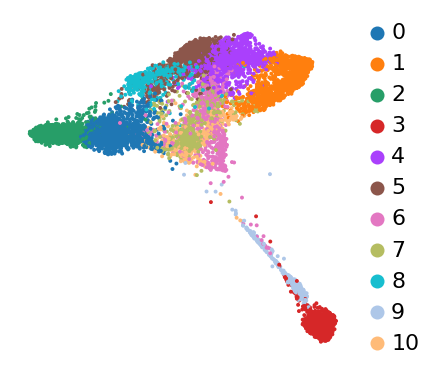

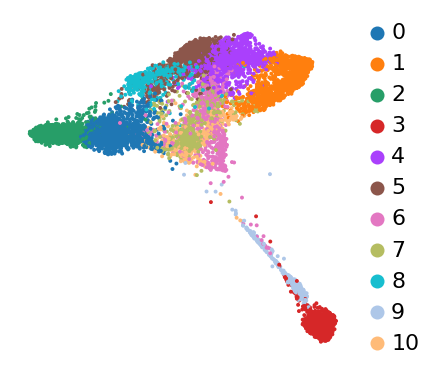

In [232]:
### Original louvain cluster numeric order
save_name = '_louvain_old_scatter'

### Plot
rcParams['figure.figsize'] = 3, 3
sc.pl.draw_graph(adata, color=['louvain_old'], frameon=False, save=save_name + '.png', title='')
sc.pl.draw_graph(adata, color=['louvain_old'], frameon=False, save=save_name + '.pdf', title='')

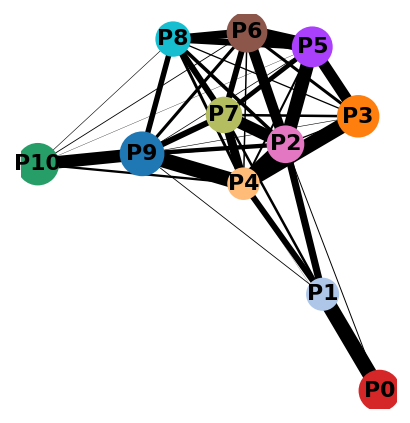

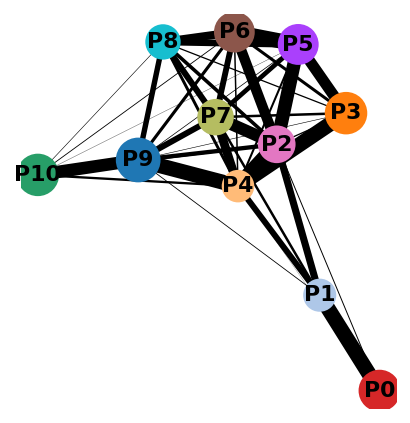

In [240]:
### New louvain cluster numeric order - Node plot
save_name = 'louvain_new_node'

### Plot
rcParams['figure.figsize'] = 3.5, 3.3
sc.pl.paga(adata, color=['louvain'], node_size_scale=2.5, frameon=False, save=save_name + '.png')
sc.pl.paga(adata, color=['louvain'], node_size_scale=2.5, frameon=False, save=save_name + '.pdf')

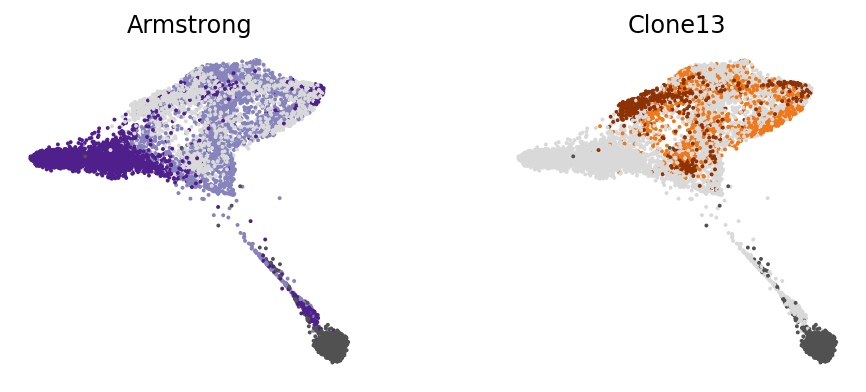

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

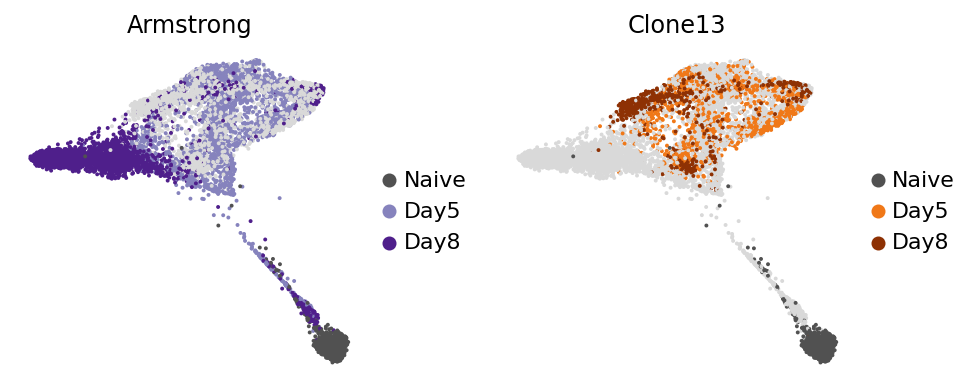

In [241]:
### Hightlight by day
save_name = '_Arm_vs_Cl13---byDay'

### Plot
adata.obs['Armstrong'] = [x if "C" not in x else "" for x in adata.obs['cell_type']]
adata.obs['Armstrong'] = ["Naive" if x == 'NP14B' else "" if x == "" else "Day%s"%x[1] for x in adata.obs['Armstrong']]
adata.obs['Armstrong'] = pd.Categorical(adata.obs['Armstrong'].tolist(), categories=['', 'Naive','Day5', 'Day8']) 
adata.uns['Armstrong_colors'] = [plt.cm.Greys(0.25), plt.cm.Greys(0.75), plt.cm.Purples(0.6), plt.cm.Purples(0.9)]

adata.obs['Clone13'] = [x if "A" not in x else "" for x in adata.obs['cell_type']]
adata.obs['Clone13'] = ["Naive" if x == 'NP14B' else "" if x == "" else "Day%s"%x[1] for x in adata.obs['Clone13']]
adata.obs['Clone13'] = pd.Categorical(adata.obs['Clone13'].tolist(), categories=['', 'Naive','Day5', 'Day8']) 
adata.uns['Clone13_colors'] = [plt.cm.Greys(0.25), plt.cm.Greys(0.75), plt.cm.YlOrBr(0.6),  plt.cm.YlOrBr(0.9)]

rcParams['figure.figsize'] = 3, 3
sc.pl.draw_graph(adata, color=['Armstrong', 'Clone13'], frameon=False, save=save_name + '.png',  legend_loc=None)
sc.pl.draw_graph(adata, color=['Armstrong', 'Clone13'], frameon=False, save=save_name + '.pdf')

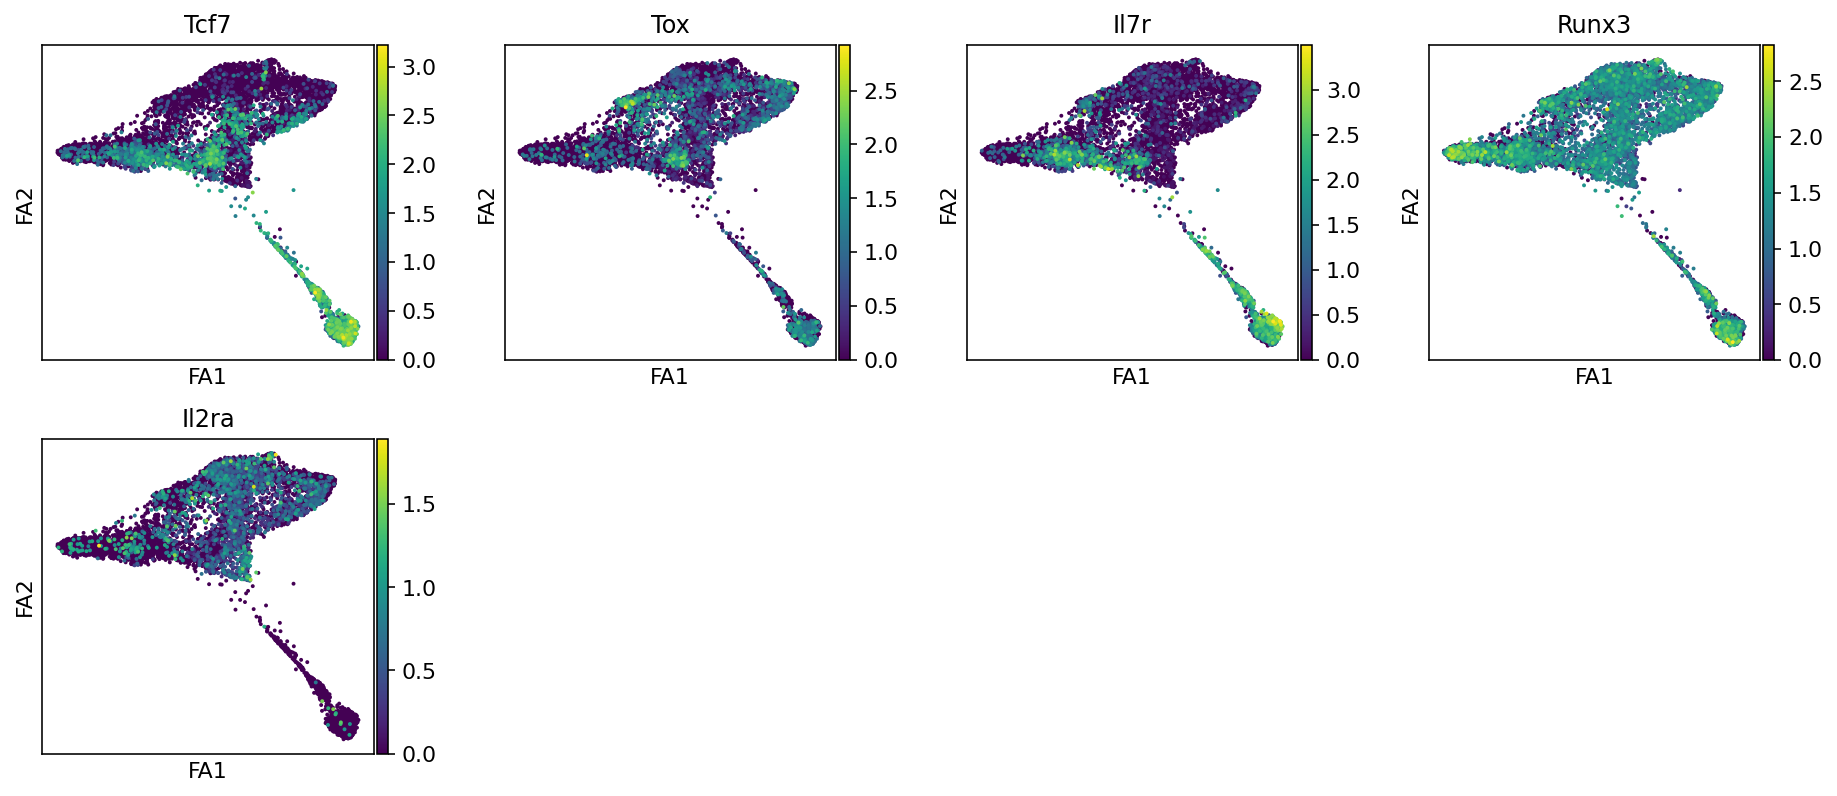

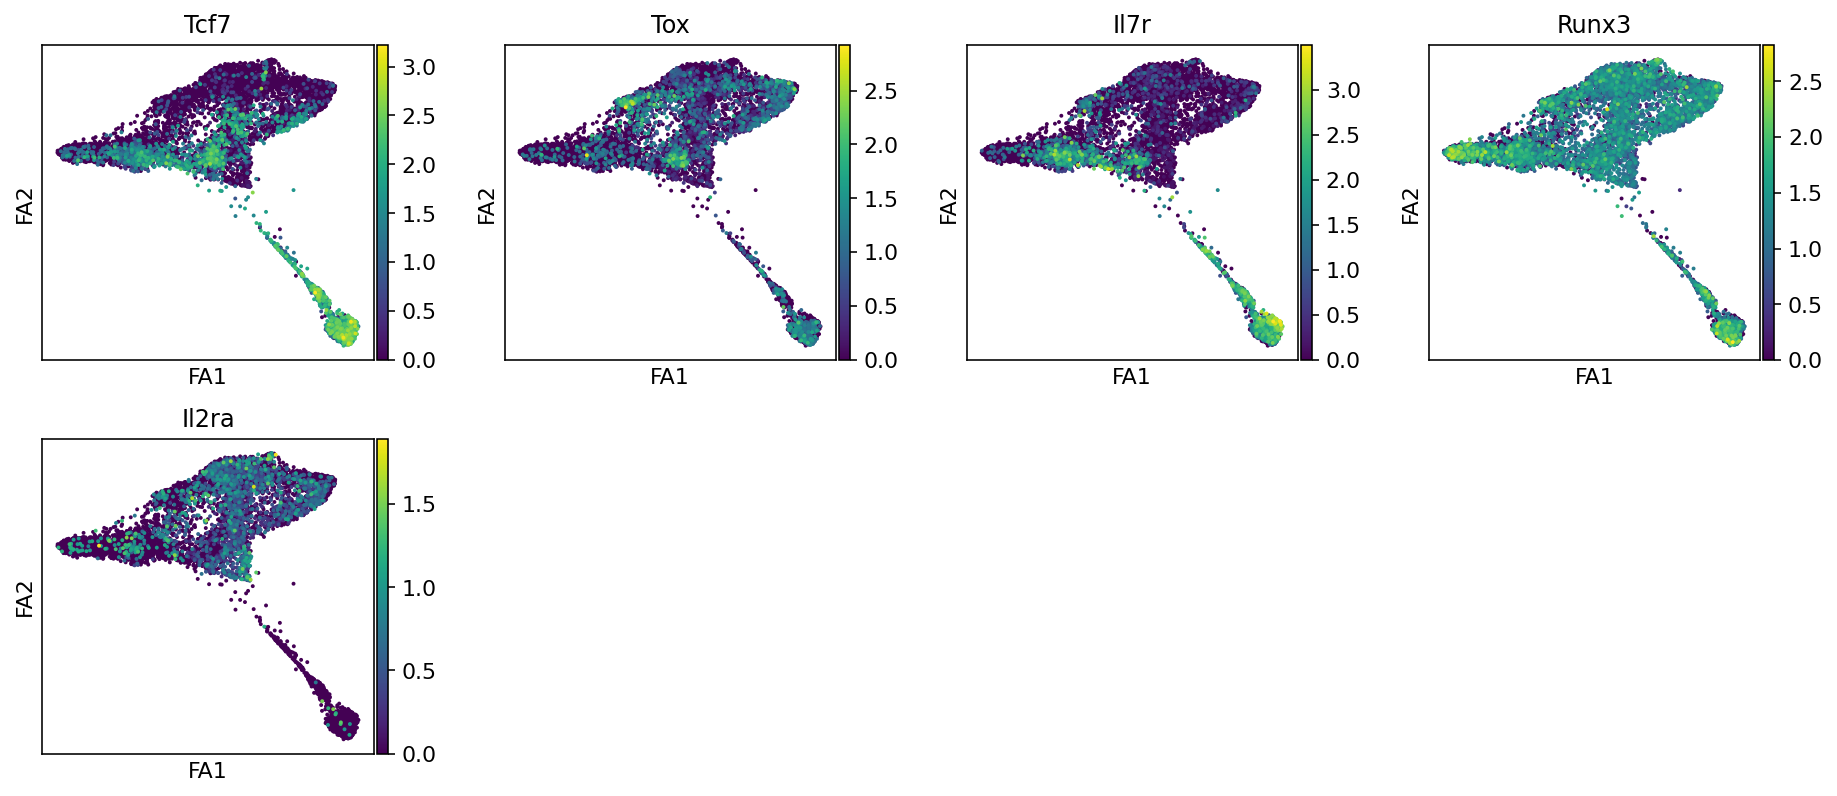

In [122]:
### Scatter plot with signature genes
save_name = 'Slt_genes_scatter'

### Plot
rcParams['figure.figsize'] = 3, 3
slt_genes = ['Tcf7', 'Tox', 'Il7r', 'Runx3', 'Il2ra']
sc.pl.draw_graph(adata, color=slt_genes, color_map='viridis', save=save_name + '.png')
sc.pl.draw_graph(adata, color=slt_genes, color_map='viridis', save=save_name + '.pdf')

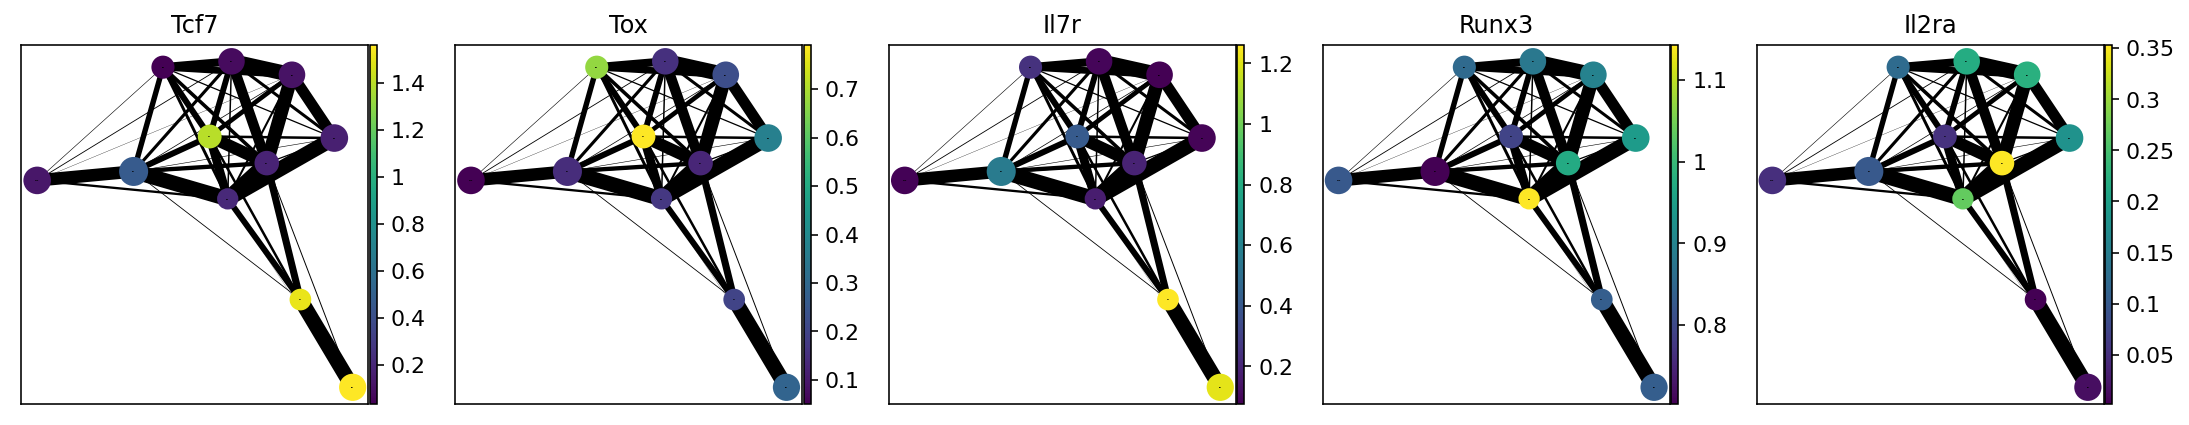

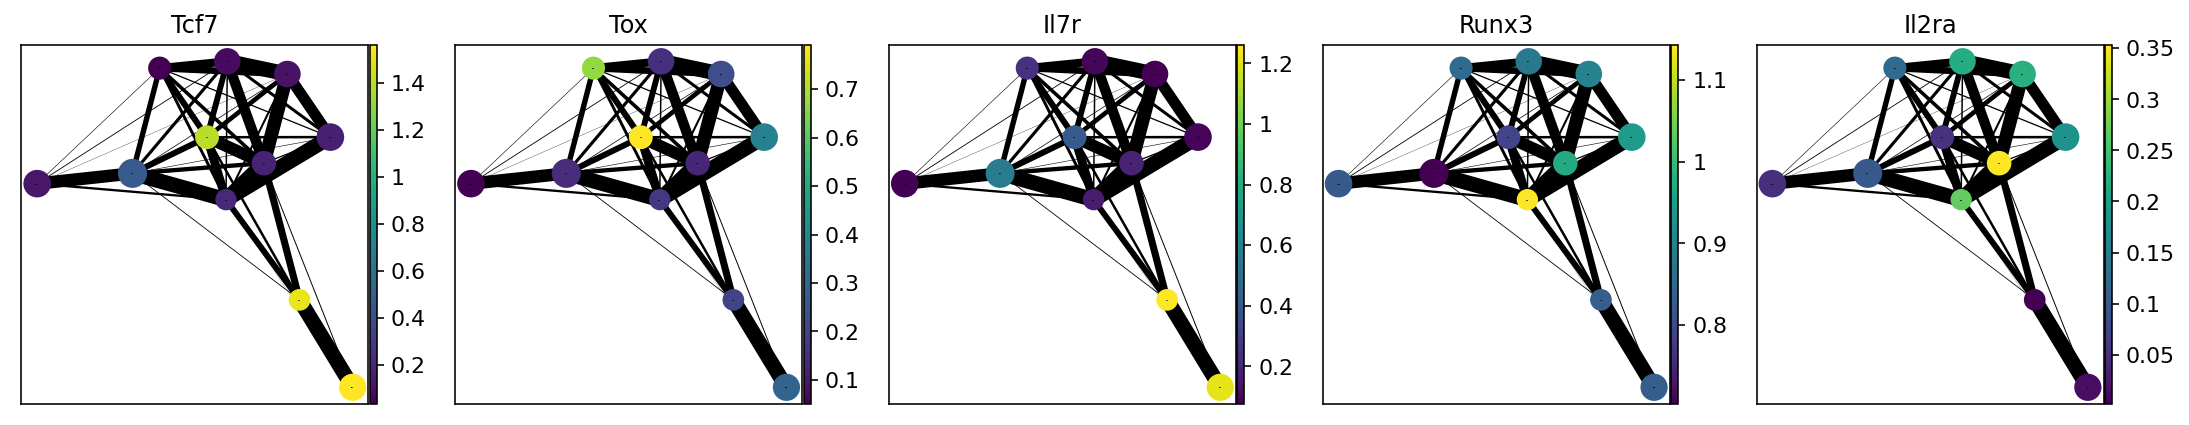

In [123]:
### Node plot with signature genes
save_name = 'Slt_genes_node'

### Plot
rcParams['figure.figsize'] = 3.3, 3
slt_genes = ['Tcf7', 'Tox', 'Il7r', 'Runx3', 'Il2ra']
sc.pl.paga(adata, color=slt_genes, fontsize=0, cmap='viridis', save=save_name + '.png')
sc.pl.paga(adata, color=slt_genes, fontsize=0, cmap='viridis', save=save_name + '.pdf')

... storing 'Infection type' as categorical


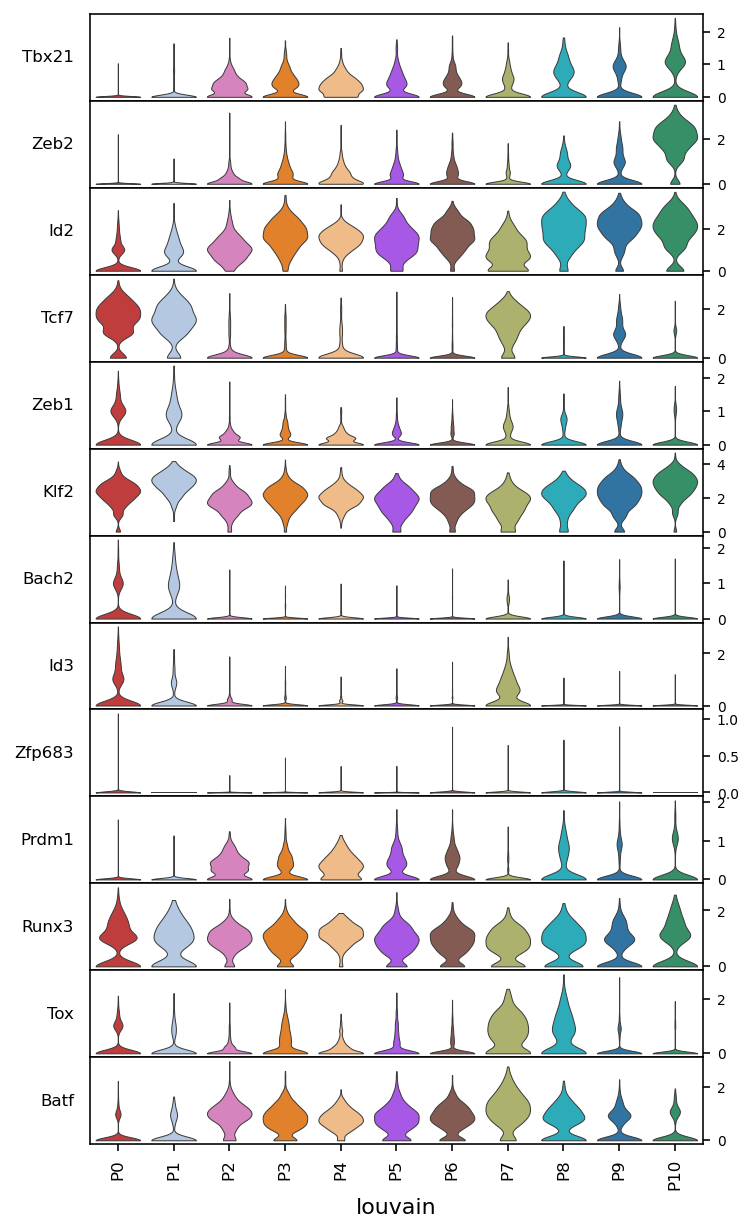

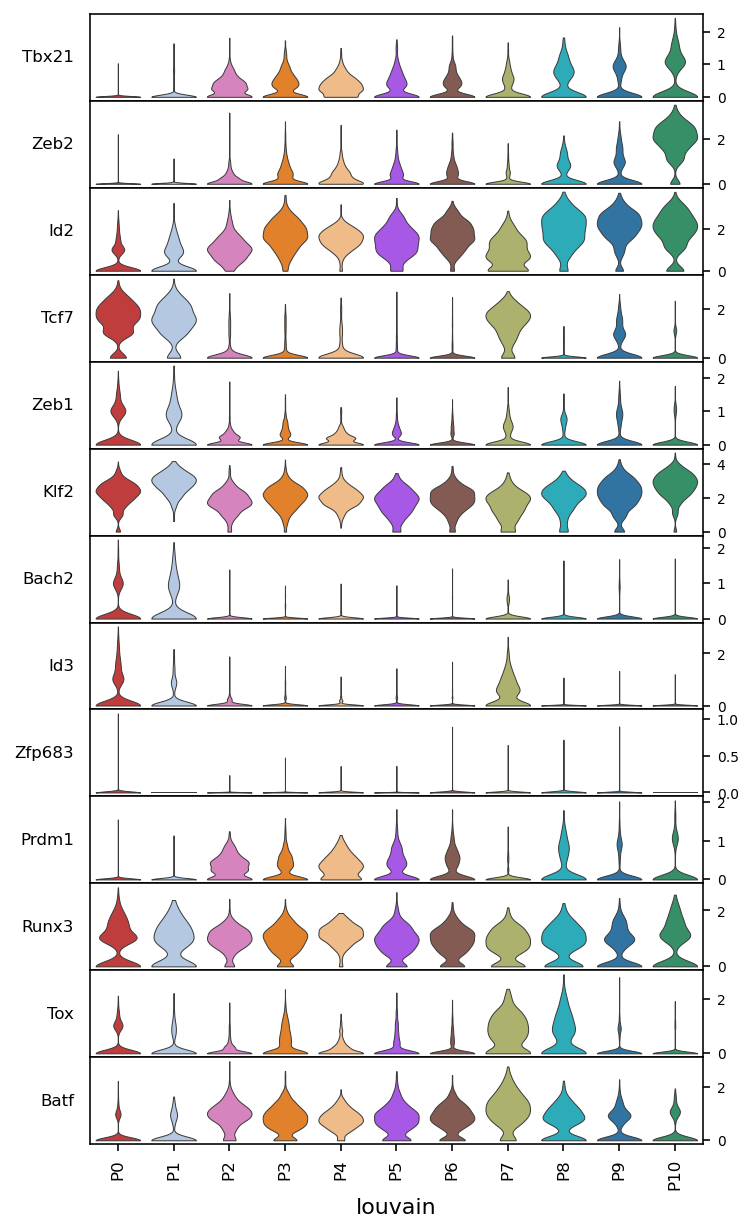

In [8]:
### Violin plot with selected genes
save_name = 'Slt_genes_violin'

slt_genes = ['Tbx21', 'Zeb2', 'Id2', 'Tcf7', 'Zeb1', 'Klf2', 'Bach2', 'Id3', 'Zfp683', 'Prdm1', 'Runx3', 'Tox', 'Batf']
sc.pl.stacked_violin(adata_neworder, slt_genes, groupby='louvain', swap_axes=True, cmap='Blues', palette=new_louvain_colors, figsize=(6,10), save=save_name + '.png')
sc.pl.stacked_violin(adata_neworder, slt_genes, groupby='louvain', swap_axes=True, cmap='Blues', palette=new_louvain_colors, figsize=(6,10), save=save_name + '.pdf')

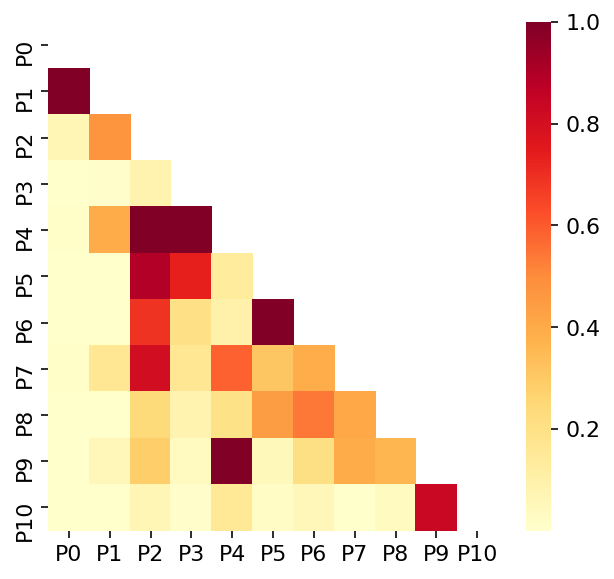

In [206]:
### Correlation heatmap
save_name = 'paga_corr'

### Plot
rcParams['figure.figsize'] = 5, 4.5

conn_df = pd.DataFrame.sparse.from_spmatrix(adata.uns['paga']['connectivities'])
conn_df.columns = old_louvain_order
conn_df.index = old_louvain_order
conn_df = conn_df[louvain_new_ordered]
conn_df = conn_df.loc[louvain_new_ordered]

mask = np.triu(np.ones_like(conn_df, dtype=bool))
corr_plot = sns.heatmap(conn_df, mask=mask, cmap="YlOrRd")
corr_plot.figure.savefig(save_name + ".png")
corr_plot.figure.savefig(save_name + ".pdf")

## 2. Distribution

In [11]:
adata.obs['cell_type_plot'] = ['Naive' if x =='NP14B' else x for x in adata.obs['cell_type']]
adata.obs['cell_type_plot'] = [x[:2] if x != 'Naive' else x for x in adata.obs['cell_type_plot']]
cell_type_plot_order = ['Naive', 'A5', 'A8', 'C5', 'C8']
adata.obs['cell_type_plot'] = pd.Categorical(adata.obs['cell_type_plot'].tolist(), categories=cell_type_plot_order)

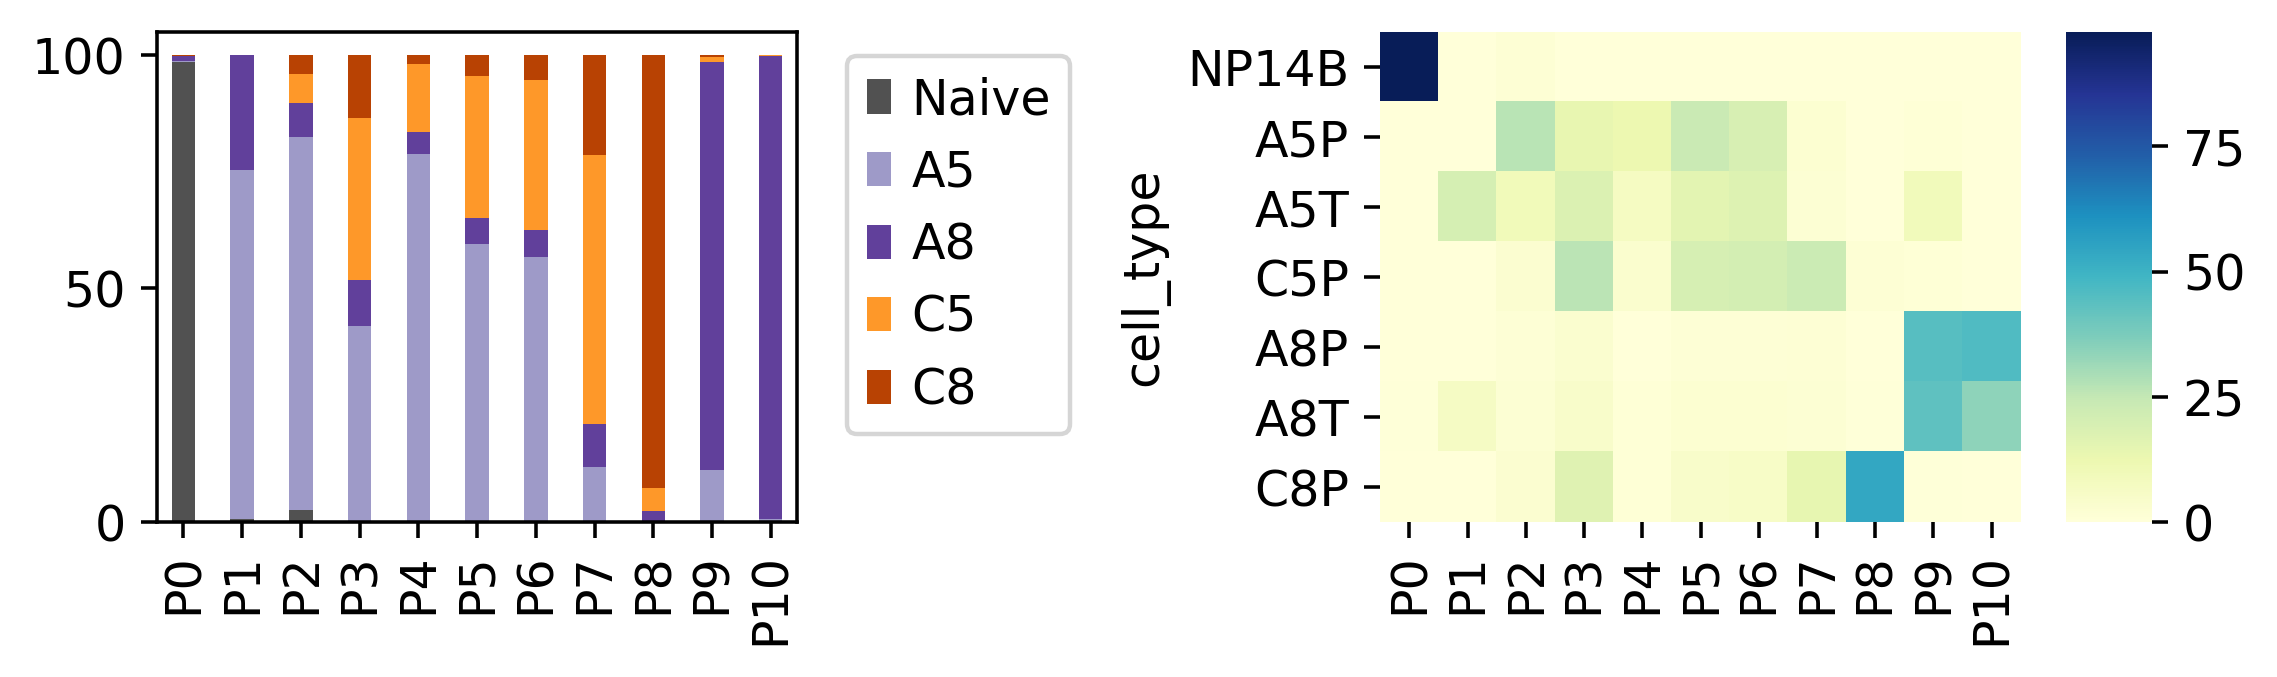

In [13]:
### Hightlight by day
save_name = 'Louvain_cell-type_distribution'

### Plot
fig, axes = plt.subplots(ncols=2, nrows=1, sharey=False, figsize=(7,2), constrained_layout = True, dpi=160)

col_list = [plt.cm.Greys(0.75), plt.cm.Purples(0.5), plt.cm.Purples(0.8),  plt.cm.YlOrBr(0.5),  plt.cm.YlOrBr(0.8)]
sum_df = sc_pl_addons.count_pctg_stack_bars(adata,  'louvain', 'cell_type_plot','cell_id', 
                                   None, None, axes[0], col_list,True)

key1 = 'louvain'
key2 = 'cell_type'
count = 'cell_id'
sum_df = adata.obs.reset_index()[[key1, key2, count]].drop_duplicates(count).groupby([key1, key2]).count()[[count]].unstack(key1)
sum_df.columns = [x[1] for x in sum_df.columns.values] 
sum_df[np.isnan(sum_df)] = 0
for i in range(0, len(sum_df)):
    sum_df.iloc[i] = sum_df.iloc[i] / sum(sum_df.iloc[i]) * 100
sum_df_cols = sum_df.columns.tolist()
sum_df_cols = sorted(sum_df_cols, key=lambda x: int(re.findall("\d+", x)[0]))
sum_df = sum_df[sum_df_cols]

sum_df_plot = sum_df.loc[['NP14B','A5P', 'A5T', 'C5P', 'A8P', 'A8T', 'C8P'], :]
sns.heatmap(sum_df_plot, cmap='YlGnBu', ax=axes[1])

plt.show()
fig.savefig(save_name + '.png')
fig.savefig(save_name + '.pdf')
plt.close()

## 3. Expression heatmap

In [18]:
#gs_plot_use_file = '/media/pipkin/ROCKET-PRO/T_cell_signature_Reference/Y_annotated/anno_plotuse_gs_20200928.csv'
#gs_plot_use_df = pd.read_csv(gs_plot_use_file)
#gs_use = gs_plot_use_df[gs_plot_use_df['plot_use'].notnull()]['gs_name'].tolist()

#gs_file = '/media/pipkin/ROCKET-PRO/T_cell_signature_Reference/X_GeneSignatures_mm/all_mouse_T_cell_signatures.csv'
#gs_df = pd.read_csv(gs_file)
#gs_df_use = gs_df[[True if x in gs_use else False for x in gs_df['gs_name']]]
#genes_use = list(set(gs_df_use['gene_symbol'].tolist()))

### Intersect chromatin regulators & TF & cell surface receptors
surface_df = pd.read_csv('https://raw.githubusercontent.com/Yolanda-HT/SurfaceMarkerSelect/master/MM_MARKERS.csv')
surface_genes = surface_df['gene_name'].tolist()
crf_df = pd.read_csv('https://raw.githubusercontent.com/ScrippsPipkinLab/CRF_Screen/master/Ref/CRF_all.csv?token=AGIX2OZNRQF2KWG2ZLZ6ZDC7S35MU')
crf_genes = crf_df['gene_name'].tolist() + [x for x in crf_df['Alternative'].tolist() if str(x) != 'nan']
tf_df = pd.read_csv('https://raw.githubusercontent.com/Yolanda-HT/TFclassDataCollection/master/Ravasi_TF.csv')
tf_genes = tf_df['symbol'].tolist()
all_genes = list(set(surface_genes + crf_genes + tf_genes))

genes_use = all_genes

In [22]:
diff_dir = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/0_Scanpy_out_resampled/2_DE/eachCluster_vs_All'
diff_files = glob.glob("%s/*.csv"%diff_dir)

padj_list = ['wilcoxon_padj', 't-test_padj', 't-test_overestim_var_padj']
fc = 't-test_logfc'

louvain_sig_genes_plot_dict = {}
for i in diff_files:
    i_name = i.split("/")[-1].split("_")[0]
    
    i_df = pd.read_csv(i)


    i_df_sig = i_df
    for padj in padj_list:
        i_df_sig = i_df_sig[i_df_sig[padj] <= 0.05]

    i_df_sig = i_df_sig[i_df_sig[fc] > 1]

    i_df_sig_use = i_df_sig[[True if x in genes_use else False for x in i_df_sig['gene_names']]] # Select only the genes that are in GSEA
    #i_df_sig_use = i_df_sig[[False if (x.startswith("Rps") or x.startswith("Rpl")) else True for x in i_df_sig['gene_names']]] # Remove genes that are ribosomal
    i_df_sig_use = i_df_sig_use.sort_values(['t-test_score'], ascending=False)
    
    louvain_sig_genes_plot_dict[i_name] = pd.Series(i_df_sig_use['gene_names'].tolist())
    print("%s: %s signature genes"%(i_name, len(i_df_sig_use)))
louvain_sig_genes_plot_df = pd.DataFrame(louvain_sig_genes_plot_dict)
louvain_sig_genes_plot_df.to_csv("louvain_signature_genes.csv", index=False)

louvain_sig_genes_plot_df.columns = [louvain_new_ordered[louvain_old_ordered.index(int(x))] for x in louvain_sig_genes_plot_df.columns.tolist()]
louvain_sig_genes_plot_df = louvain_sig_genes_plot_df[louvain_new_ordered]
louvain_sig_genes_plot_df.to_csv("louvain_signature_genes_neworder.csv", index=False)

0: 30 signature genes
1: 53 signature genes
10: 58 signature genes
2: 34 signature genes
3: 66 signature genes
4: 65 signature genes
5: 15 signature genes
6: 131 signature genes
7: 61 signature genes
8: 36 signature genes
9: 47 signature genes


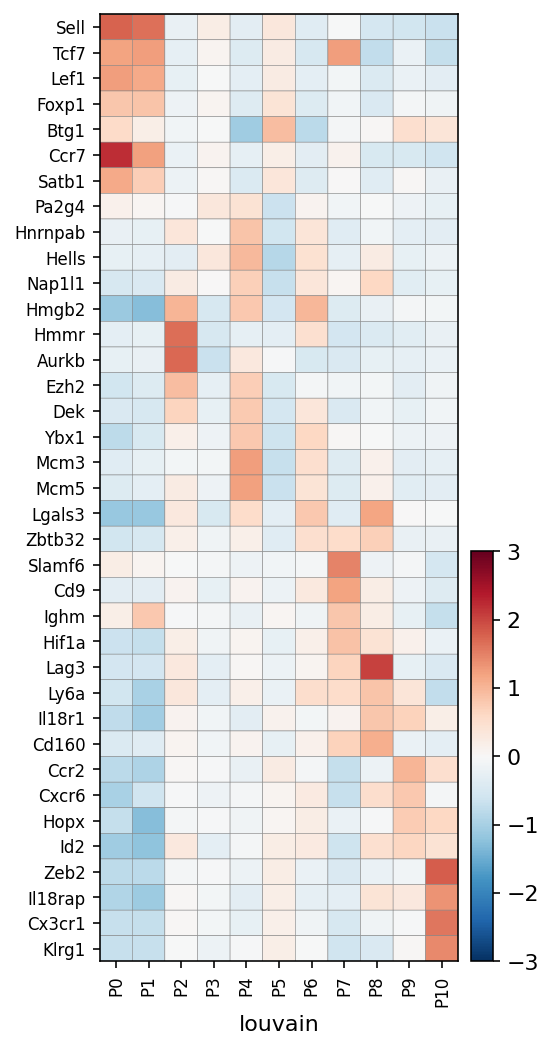

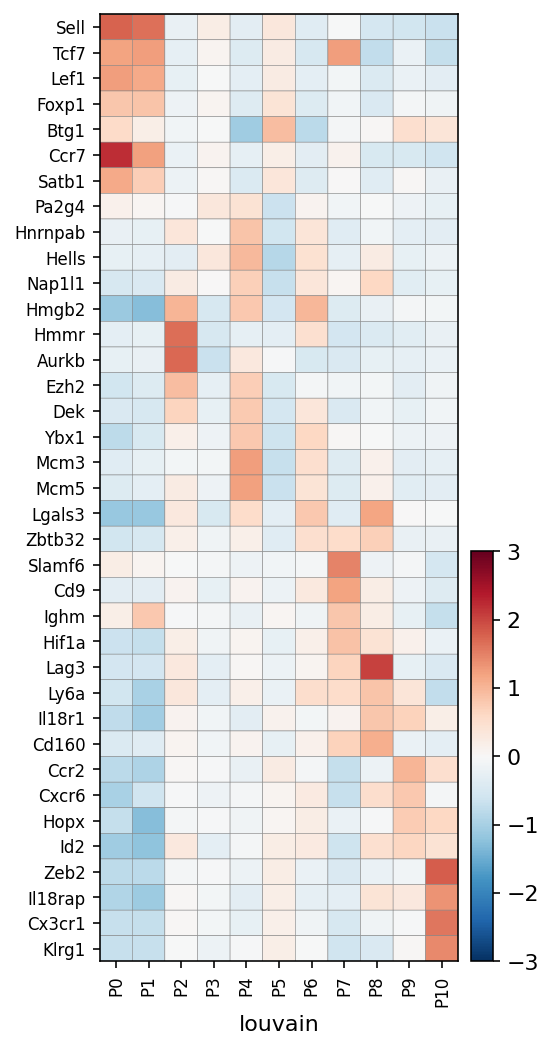

GridSpec(2, 3, height_ratios=[0, 7.4], width_ratios=[3.3, 0, 0.2])

In [23]:
### Heatmap for signature genes of louvain clusters
save_name = 'Louvain_cluster_signature_genes'

### Plot
marker_genes = []
for i in louvain_new_ordered:
    marker_genes = marker_genes + louvain_sig_genes_plot_df[i].tolist()[:5]
marker_genes = [ x for x in marker_genes if x not in ['Prmt1', 'Phb2', 'Mxd3', 'Fkbp2', 'Ssrp1', 'Hmgb3']]

marker_genes_use = []
for i in marker_genes:
    if i not in marker_genes_use:
        marker_genes_use.append(i)
        
adata_neworder.layers['scaled'] = sc.pp.scale(adata_neworder, copy=True).X
sc.pl.matrixplot(adata_neworder, marker_genes_use, layer='scaled',groupby='louvain', vmin=-3, vmax=3, swap_axes=True, save=save_name + ".png")
sc.pl.matrixplot(adata_neworder, marker_genes_use, layer='scaled',groupby='louvain', vmin=-3, vmax=3, swap_axes=True, save=save_name + ".pdf")

# 4. GSEA node plot
## Per louvain cluster - Seperate Arm & Cl13

In [104]:
gsea_output = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/0_Acute-Chronic/0_resampled/louvain_celltype_sum_plot/louvain_celltype_gsea_all.csv'
gsea_output_df = pd.read_csv(gsea_output)

In [192]:
use_path = '2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up'
gsea_use_df = gsea_output_df[gsea_output_df['pathway'] == use_path]
gsea_use_df = gsea_use_df[[True if 'A5P' in x else False for x in gsea_use_df['comparison']]]
gsea_use_df['louvain'] = [x.split("_")[0] for x in gsea_use_df['comparison']]
gsea_use_df

,comparison,pathway,NES,padj,leadingEdge_signal,mlog10padj,old_names,louvain
10,P9_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,-1.302685,0.061733,16,1.209480,0_A5P,P9
134,P3_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,2.342110,0.000414,37,3.383182,1_A5P,P3
248,P4_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,-2.590711,0.000377,53,3.423599,10_A5P,P4
370,P10_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,1.155559,0.433066,24,0.363445,2_A5P,P10
571,P5_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,2.504452,0.000374,41,3.427076,4_A5P,P5
685,P6_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,2.647048,0.000370,49,3.432049,5_A5P,P6
799,P2_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,-2.294118,0.000499,46,3.301772,6_A5P,P2
937,P7_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,-2.567349,0.001091,36,2.962020,7_A5P,P7
1049,P8_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,1.201819,0.600431,29,0.221537,8_A5P,P8
1125,P1_A5P,2018_IMMUNITY_Wang---D5KLRG1lo_vs_Naive_up,-2.407305,0.007211,41,2.142027,9_A5P,P1


In [194]:
adata.obs['NES'] = [gsea_use_df['NES'].tolist()[gsea_use_df['louvain'].tolist().index(x)] if x in gsea_use_df['louvain'].tolist() else 0 
                    for x in adata.obs['louvain']]

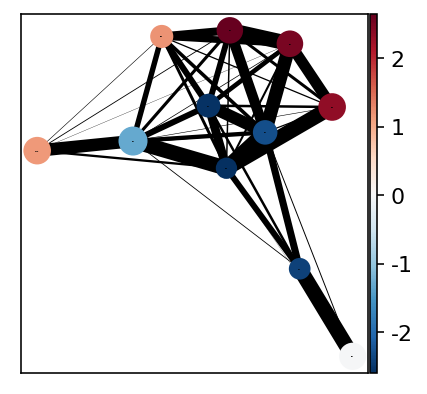

In [197]:
rcParams['figure.figsize'] = 3.3, 3
sc.pl.paga(adata, color=['NES'], fontsize=0)

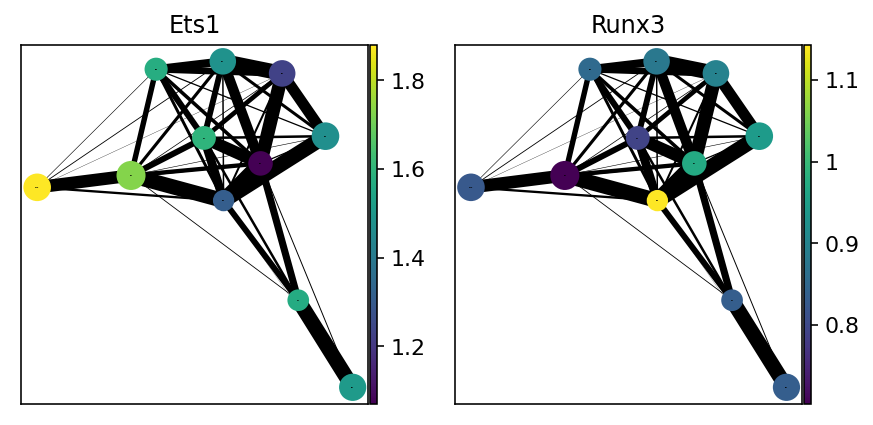

In [205]:
sc.pl.paga(adata, color=['Ets1', 'Runx3'], cmap='viridis', fontsize=0, save="Ets1-Runx3.png")

In [299]:
# Calculate radius of louvain cluster circles
radius_series = np.sqrt(adata.obs.groupby('louvain').count()['cell_type']) 
radius_series_p0_15 = radius_series / radius_series['P0'] * 0.15
radius_series_p0_15

louvain
P9     0.172508
P3     0.154747
P10    0.154425
P0     0.150000
P5     0.142758
P6     0.141793
P2     0.119971
P7     0.112236
P8     0.105121
P1     0.091277
P4     0.087936
Name: cell_type, dtype: float64